In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
from astropy.io import fits

# From Old Data (Observation Night 1)

Not used for anything right now, but it looks nice so I want to leave it in the notebook.

# Observation Night 2

In [2]:
ngc891 = fits.open('../new_data/bulge_ngc891.00000001.FIT')

# Make the master dark
#   30min_dark.00000002.DARK.FIT has residual lines in it, not used
dark30m_names = ['dark_30m.00000001.DARK.FIT', 'newnew_dark.00000000.DARK.FIT',
                 '30min_dark.00000004.DARK.FIT', 'newnew_dark.00000001.DARK.FIT']
dark30m = []
for file in dark30m_names:
    dark = fits.open('../new_data/{0}'.format(file))
    dark30m.append(dark[0].data)
    dark.close()

master_dark = np.median(dark30m, axis=0)

data = ngc891[0].data

ngc891.close()

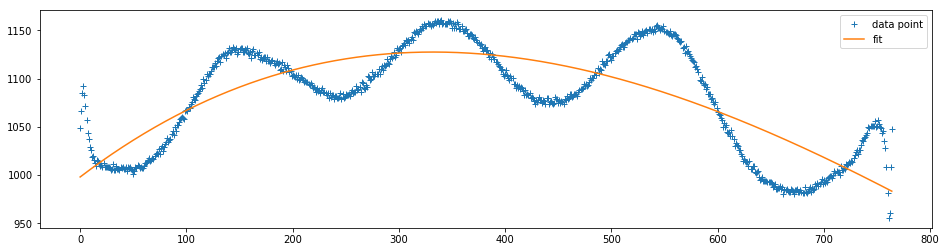

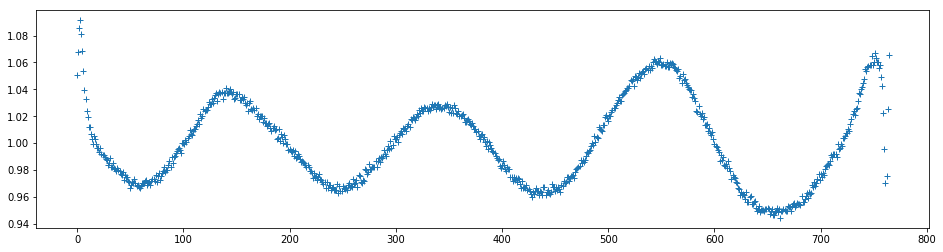

In [3]:
# Make the master flat

#30s darks
dark30s_1=fits.open('../new_data/30s_dark.00000008.DARK.FIT')[0].data
dark30s_2=fits.open('../new_data/30s_dark.00000009.DARK.FIT')[0].data
dark30s_3=fits.open('../new_data/30s_dark.00000010.DARK.FIT')[0].data
m_dark30s=(dark30s_1+dark30s_2+dark30s_3)/3

#30s flat
flatnames=['30s_flat.00000003.FLAT.FIT','30s_flat.00000005.FLAT.FIT',
           '30s_flat.00000006.FLAT.FIT','30s_flat.00000007.FLAT.FIT']
flat1=fits.open('../new_data/30s_flat.00000003.FLAT.FIT')[0].data
flat2=fits.open('../new_data/30s_flat.00000005.FLAT.FIT')[0].data
flat3=fits.open('../new_data/30s_flat.00000006.FLAT.FIT')[0].data
flat4=fits.open('../new_data/30s_flat.00000007.FLAT.FIT')[0].data
flatdata=[flat1,flat2,flat3,flat4]
m_flat=sum(flatdata)/4-m_dark30s

#cut the slit
m_flatcut=m_flat[28:89,:]
avgflat=np.mean(m_flatcut,axis=0)
pix_pos=np.array([i for i in range(765)])
plt.figure(figsize=(16,4))
plt.plot(pix_pos,avgflat,'+',label='data point')
fit=np.poly1d(np.polyfit(pix_pos,avgflat,3))
plt.plot(pix_pos,fit(pix_pos),label='fit')
plt.legend()

normflat=avgflat/fit(pix_pos)
plt.figure(figsize=(16,4))
plt.plot(pix_pos,normflat,'+')
plt.show()

8326.45152634 8310.0 361.903596585
1.0


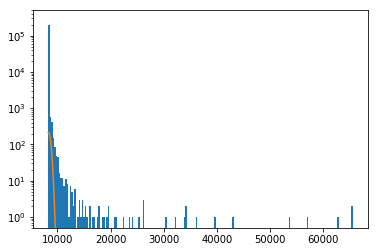

-------------------------------
8320.77086668 8310.0 65.6530158487
0.9992464436755094


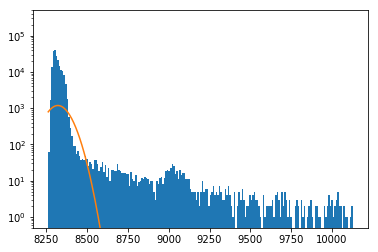

-------------------------------
8316.79653526 8310.0 26.8142475414
0.9939561707035756


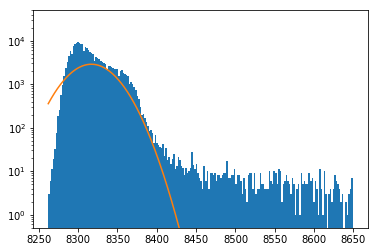

-------------------------------
8316.10412862 8310.0 23.6546900631
0.9908240420351146


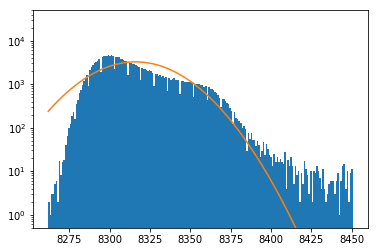

In [4]:
# Define a clip that can remove the saturated values in master dark
# Do it a few times until the data is well described by a gaussian.
def gaussian(x, m, s, N):         # x val, mean, stddev, number of points
    f_of_x = N/np.sqrt(2*np.pi*s*s)
    f_of_x *= np.exp(-0.5 * ( (x-m)/s )**2)
    return f_of_x
# -------------------------------------------------------------------------------------

mdark_avg0 = np.mean(master_dark.flatten())
mdark_med0 = np.median(master_dark.flatten())
mdark_std0 = np.std(master_dark.flatten())
range0 = np.linspace(master_dark.flatten().min(), master_dark.flatten().max(), 300)
print(mdark_avg0, mdark_med0, mdark_std0)
print(len(master_dark.flatten())/len(master_dark.flatten()))
# Plot
plt.hist(master_dark.flatten(), bins=200, log=True)
plt.plot(range0, gaussian(range0, mdark_avg0, mdark_std0, len(master_dark.flatten())))
plt.ylim(.5, 5e5)
plt.show()
print('-------------------------------')

# -------------------------------------------------------------------------------------

mdark_cut1 = [x for x in master_dark.flatten() if x<=mdark_avg0+5*mdark_std0 
                                               and x >=mdark_avg0-5*mdark_std0]
mdark_avg1 = np.mean(mdark_cut1)
mdark_med1 = np.median(mdark_cut1)
mdark_std1 = np.std(mdark_cut1)
range1 = np.linspace(min(mdark_cut1), max(mdark_cut1), 300)
print(mdark_avg1, mdark_med1, mdark_std1)
print(len(mdark_cut1)/len(master_dark.flatten()))
# Plot
plt.hist(mdark_cut1, log=True, bins=200)
plt.plot(range1, gaussian(range1, mdark_avg1, mdark_std1, len(mdark_cut1)))
plt.ylim(.5, 5e5)
plt.show()
print('-------------------------------')

# -------------------------------------------------------------------------------------

mdark_cut2 = [x for x in master_dark.flatten() if x<=mdark_avg1+5*mdark_std1 
                                               and x >=mdark_avg1-5*mdark_std1]
mdark_avg2 = np.mean(mdark_cut2)
mdark_med2 = np.median(mdark_cut2)
mdark_std2 = np.std(mdark_cut2)
range2 = np.linspace(min(mdark_cut2), max(mdark_cut2), 300)
print(mdark_avg2, mdark_med2, mdark_std2)
print(len(mdark_cut2)/len(master_dark.flatten()))
# Plot
plt.hist(mdark_cut2, log=True, bins=200)
plt.plot(range2, gaussian(range2, mdark_avg2, mdark_std2, len(mdark_cut2)))
plt.ylim(.5, 5e4)
plt.show()
print('-------------------------------')

# -------------------------------------------------------------------------------------

mdark_cut3 = [x for x in master_dark.flatten() if x<=mdark_avg2+5*mdark_std2 and x >=mdark_avg2-5*mdark_std2]
mdark_avg3 = np.mean(mdark_cut3)
mdark_med3 = np.median(mdark_cut3)
mdark_std3 = np.std(mdark_cut3)
range3 = np.linspace(min(mdark_cut3), max(mdark_cut3), 300)
print(mdark_avg3, mdark_med3, mdark_std3)
print(len(mdark_cut3)/len(master_dark.flatten()))


plt.hist(mdark_cut3, log=True, bins=200)
plt.plot(range3, gaussian(range3, mdark_avg3, mdark_std3, len(mdark_cut2)))
plt.ylim(.5, 5e4)
plt.show()

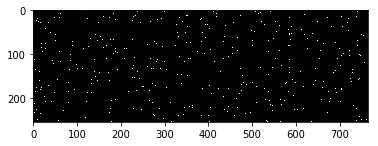

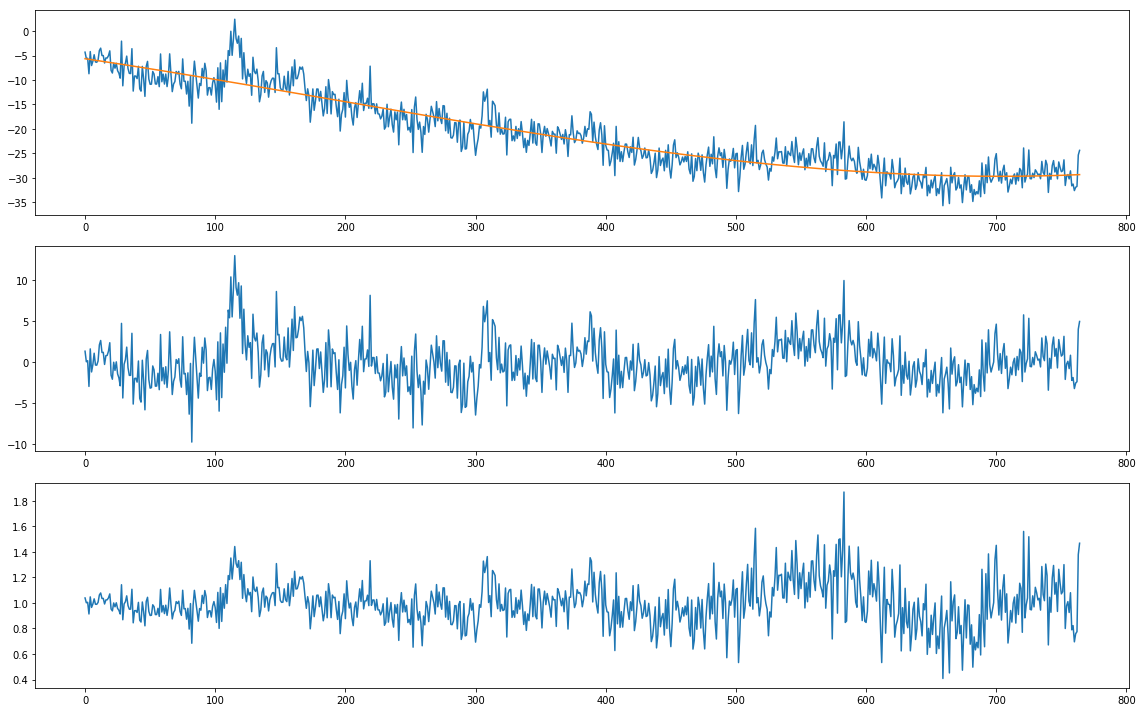

In [5]:
# Use the third cut to define a gaussian. Replace values outside 
#     the cut with values sampled from the distribution gaussian

master_dark_replaced = np.array(master_dark)
bad_map = np.zeros(shape=(master_dark.shape))

for y in range(len(master_dark_replaced)):
    for x in range(len(master_dark_replaced[y])):
        if master_dark_replaced[y][x] >= mdark_avg3+5*mdark_std3 \
        or master_dark_replaced[y][x] <= mdark_avg3-5*mdark_std3:
            master_dark_replaced[y][x] = normal(mdark_avg3, mdark_std3)
            bad_map[y][x] = 1
        else:
            master_dark_replaced[y][x]

plt.imshow(bad_map, cmap='gray')            
plt.show()

data_calibrated = (data - master_dark_replaced)/normflat
avg_ngc891_slit1 = np.median(data_calibrated[22:89], axis=0)

fitslit1 = np.poly1d(np.polyfit(np.arange(1, 766), avg_ngc891_slit1, 3))

fig, axs = plt.subplots(3, 1, figsize=(16, 10))
axs[0].plot(avg_ngc891_slit1)
axs[0].plot(fitslit1(np.arange(1, 766)))
axs[1].plot(avg_ngc891_slit1-fitslit1(np.arange(1, 766)))
axs[1].set_xlim(axs[0].get_xlim())

avg_ngc891_slit1 = np.array([x+40 for x in avg_ngc891_slit1])
fitslit1 = np.poly1d(np.polyfit(np.arange(1, 766), avg_ngc891_slit1, 3))

axs[2].plot(avg_ngc891_slit1/fitslit1(np.arange(1, 766)))
axs[2].set_xlim(axs[0].get_xlim())

ngc891.close()
fig.tight_layout()
plt.show()

### Above is the exposure of the bulge that is at the second wavelength settings, matching the reference star spectrum and the arclamp spectrum. Below is the galaxy with the first settings that we do not have wavelength calibration for.

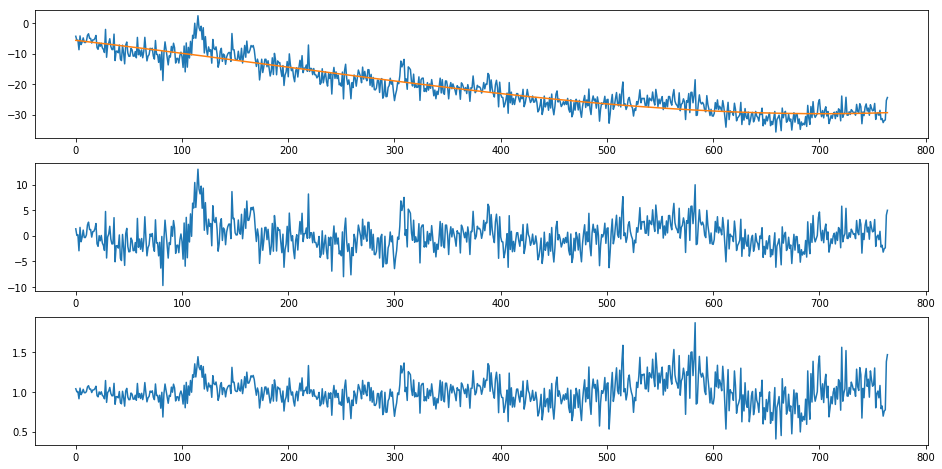

In [7]:
ngc_first = fits.open('../new_data/ngc_bulge_2.00000003.FIT')
ngc_dataset_1 = ngc_first[0].data
ngc_first.close()

dataset2 = (ngc_dataset_1-master_dark_replaced)
datamean2 = np.median(data_calibrated[22:89], axis=0)

fit2 = np.poly1d(np.polyfit(np.arange(1, 766), datamean2, 3))

fig, axs = plt.subplots(3, 1, figsize=(16, 8))

axs[0].plot(datamean2)
axs[0].plot(fit2(np.arange(1, 766)))
axs[1].plot(datamean2-fit2(np.arange(1, 766)))

datamean2 = np.array([x+40 for x in datamean2])
fit2 = np.poly1d(np.polyfit(np.arange(1, 766), datamean2, 3))

axs[2].plot(datamean2/fit2(np.arange(1, 766)))

plt.show()